## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Load Dataset

In [2]:
data = pd.read_csv("../data/heart.csv")

## 3. Information Of The Dataset

### Basic Information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Viewing first few rows

In [16]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Checking for missing values

In [20]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Statistical summary

In [31]:
pd.DataFrame(data.describe().round(2))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


## 4. Exploratory Data Analysis (EDA)

### Distribution of the target variable

<function matplotlib.pyplot.show(close=None, block=None)>

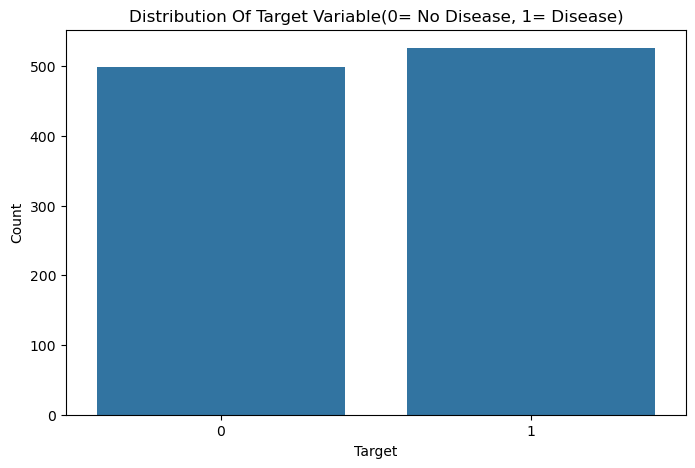

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='target', data=data)
plt.title('Distribution Of Target Variable(0= No Disease, 1= Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show

### Correlation heatmap

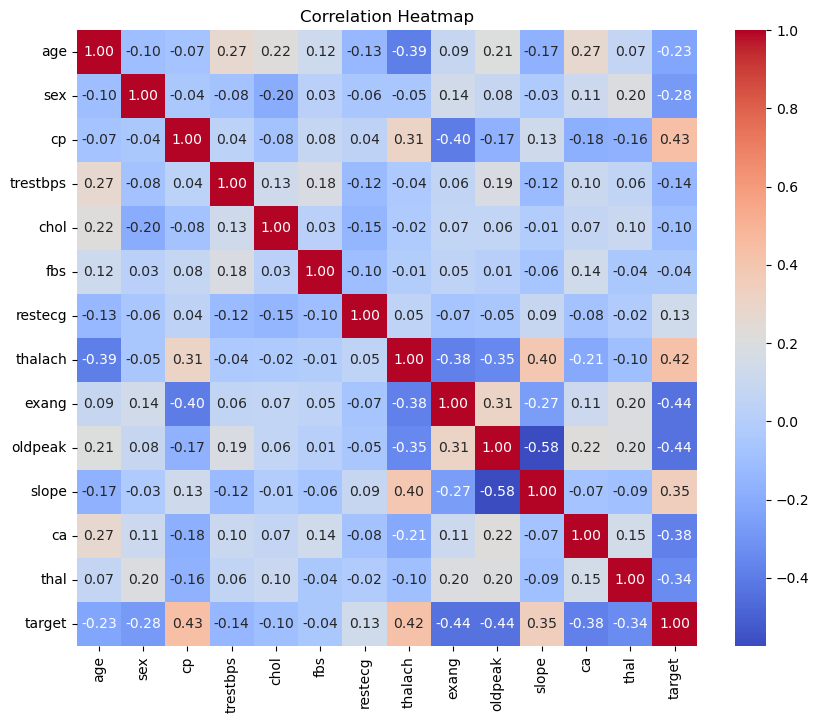

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Box plots for numerical features

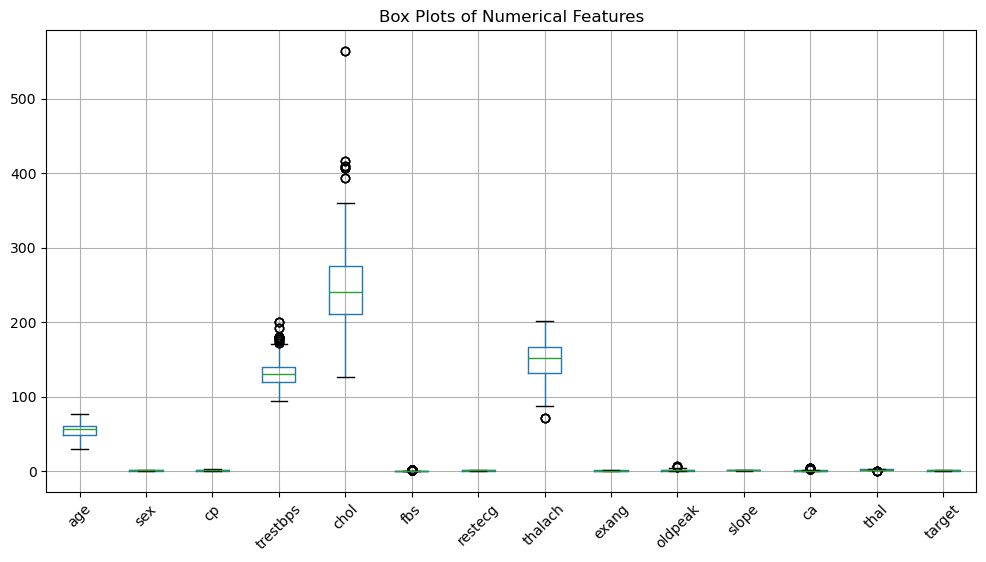

In [47]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols].boxplot(figsize=(12,6))
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

## 5. Additional Insights

### Pairplot for key features

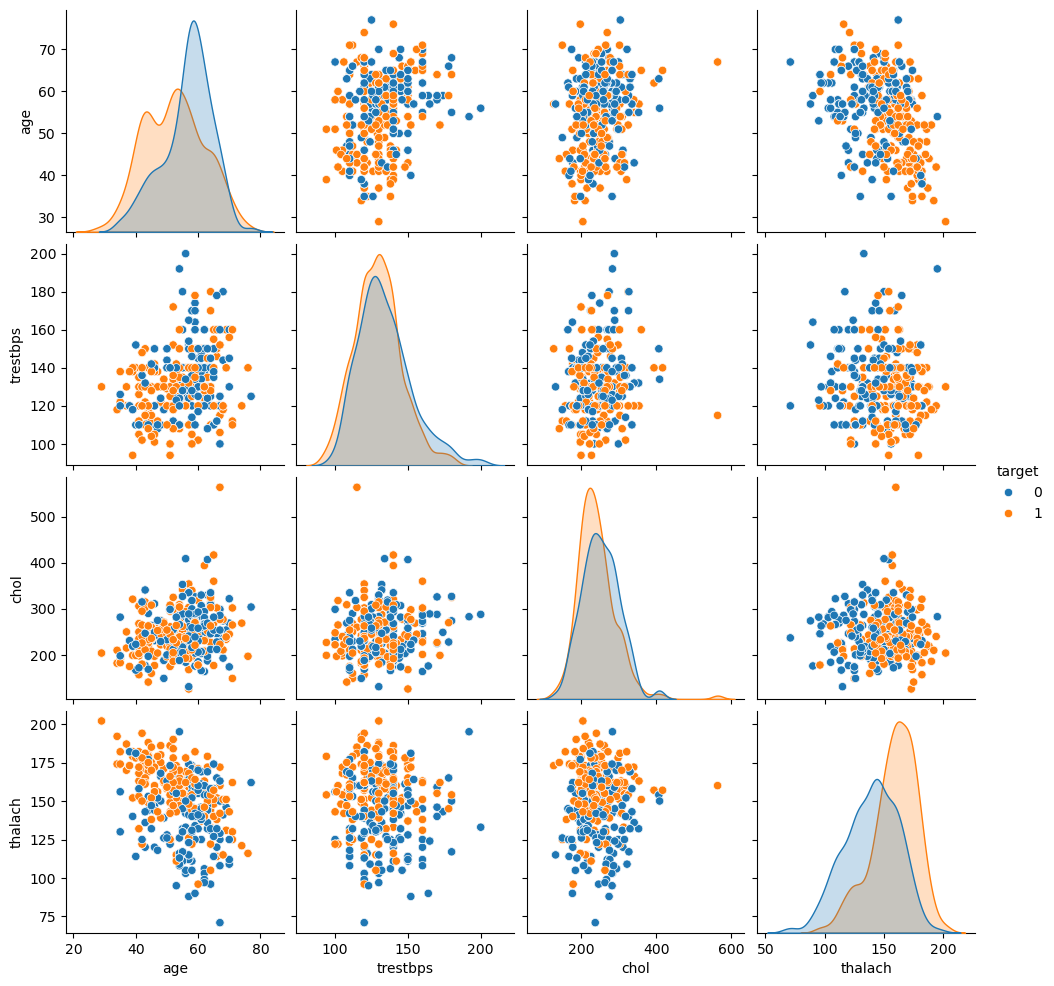

In [54]:
sns.pairplot(data[['age','trestbps','chol','thalach','target']], hue='target')
plt.show()

### Count of categorical features

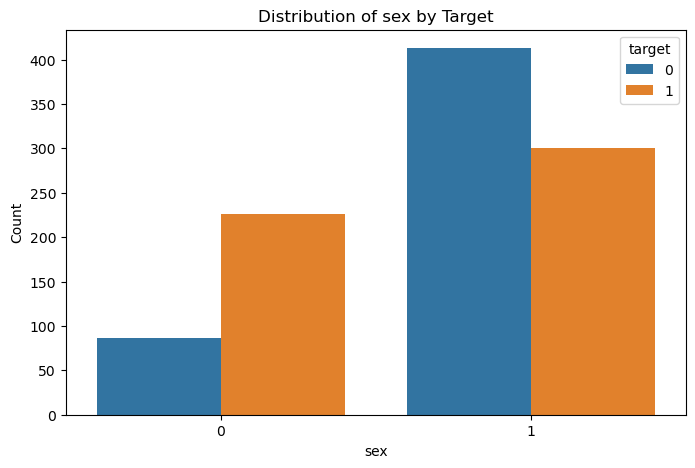

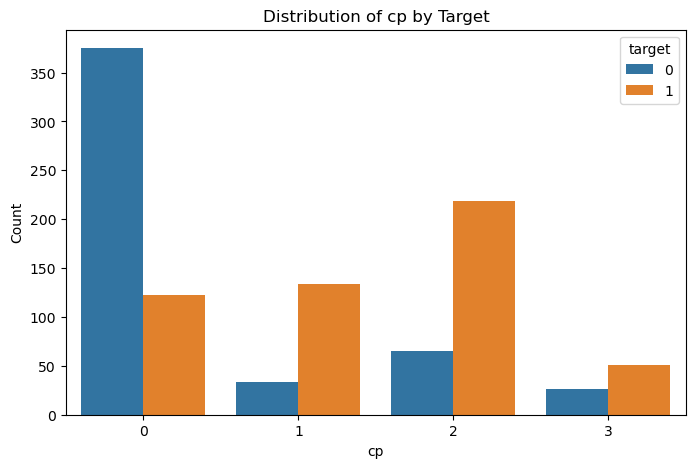

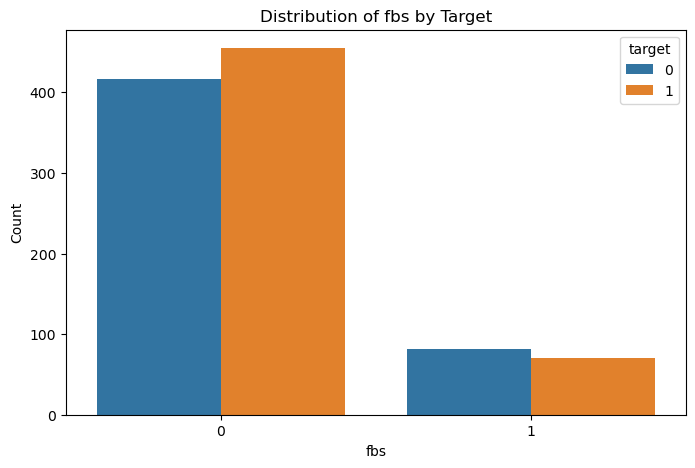

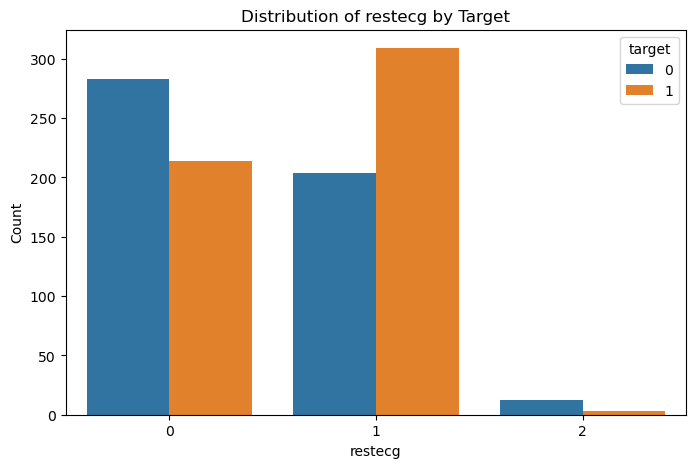

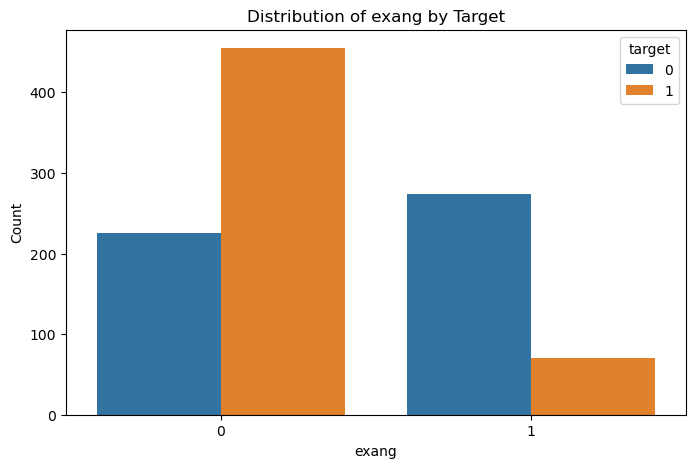

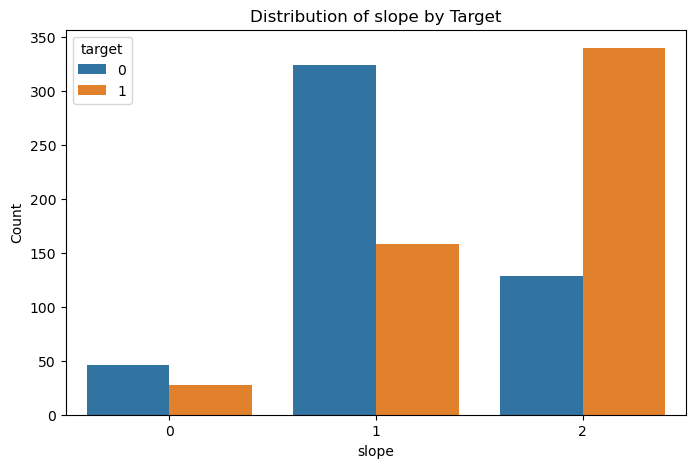

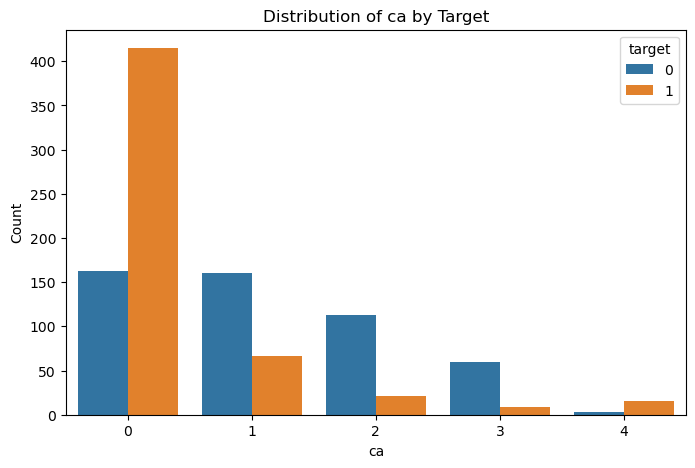

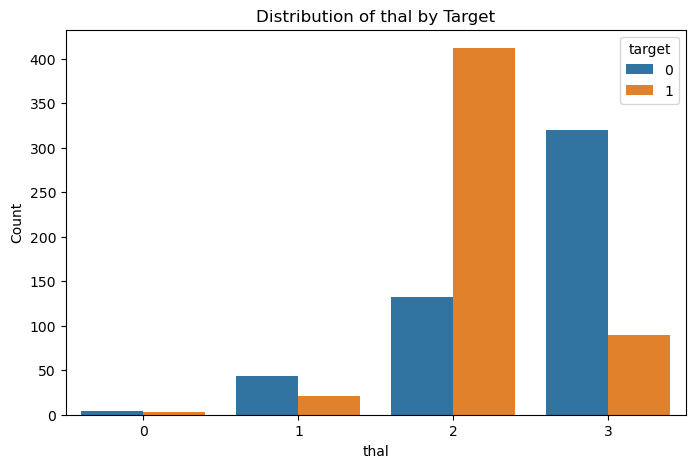

In [58]:
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, data=data, hue='target')
    plt.title(f"Distribution of {col} by Target")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Exploration Summary

- The dataset contains 1025 entries with 13 features and 1 target variable.
- No missing values detected.
- The target variable shows a mix of classes, suggesting a balanced dataset.
- Correlation heatmap and pairplots can help identify key features for modeling.